In [ ]:
!gdown https://drive.google.com/uc?id=1A6Ds9Oka3O2EnhlRz-SNdjwU64Z-8QxS

Downloading...
From: https://drive.google.com/uc?id=1A6Ds9Oka3O2EnhlRz-SNdjwU64Z-8QxS
To: /content/Test_data.zip
100% 1.98M/1.98M [00:00<00:00, 119MB/s]


In [ ]:
!gdown https://drive.google.com/uc?id=14L0FBqjnfIZ6LdcQtoKUO2_IFawv-uPn

Downloading...
From (original): https://drive.google.com/uc?id=14L0FBqjnfIZ6LdcQtoKUO2_IFawv-uPn
From (redirected): https://drive.google.com/uc?id=14L0FBqjnfIZ6LdcQtoKUO2_IFawv-uPn&confirm=t&uuid=ffc8b553-3a1f-4f8d-b958-cee4a3691a7d
To: /content/archive_1.zip
100% 177M/177M [00:01<00:00, 132MB/s]


In [ ]:
!unzip "/content/Test_data.zip"

Archive:  /content/Test_data.zip
  inflating: Test_data/6_testasl.jpg  
  inflating: Test_data/9_asl (1).jpg  
  inflating: Test_data/8(2)_asl.jpg  
  inflating: Test_data/5_asl.jpg     
  inflating: Test_data/7_asl.jpg     
  inflating: Test_data/0(2)_asl.jpg  
  inflating: Test_data/4_asl.jpg     
  inflating: Test_data/2_asl.jpg     
  inflating: Test_data/3_asl.jpg     
  inflating: Test_data/1_asl.jpg     


In [ ]:
!unzip "/content/archive_1.zip"

Archive:  /content/archive_1.zip
   creating: asl_dataset/
   creating: asl_dataset/0/
  inflating: asl_dataset/0/hand1_0_bot_seg_1_cropped.jpeg  
  inflating: asl_dataset/0/hand1_0_bot_seg_2_cropped.jpeg  
  inflating: asl_dataset/0/hand1_0_bot_seg_3_cropped.jpeg  
  inflating: asl_dataset/0/hand1_0_bot_seg_4_cropped.jpeg  
  inflating: asl_dataset/0/hand1_0_bot_seg_5_cropped.jpeg  
  inflating: asl_dataset/0/hand1_0_dif_seg_1_cropped.jpeg  
  inflating: asl_dataset/0/hand1_0_dif_seg_2_cropped.jpeg  
  inflating: asl_dataset/0/hand1_0_dif_seg_3_cropped.jpeg  
  inflating: asl_dataset/0/hand1_0_dif_seg_4_cropped.jpeg  
  inflating: asl_dataset/0/hand1_0_dif_seg_5_cropped.jpeg  
  inflating: asl_dataset/0/hand1_0_left_seg_1_cropped.jpeg  
  inflating: asl_dataset/0/hand1_0_left_seg_2_cropped.jpeg  
  inflating: asl_dataset/0/hand1_0_left_seg_3_cropped.jpeg  
  inflating: asl_dataset/0/hand1_0_left_seg_4_cropped.jpeg  
  inflating: asl_dataset/0/hand1_0_left_seg_5_cropped.jpeg  
  inflat

In [ ]:
pip install split-folders

In [ ]:
import os
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random

import splitfolders

import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator

from keras.models import Sequential
from keras.layers import Dense,Conv2D,Dropout,Flatten,MaxPooling2D, BatchNormalization,Input,concatenate
from keras.callbacks import EarlyStopping,ReduceLROnPlateau
from keras.utils import plot_model

from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
# Path where our data is located
base_path = "/content/asl_dataset"

# Dictionary to save our 36 classes
categories = {  0: "0",
                1: "1",
                2: "2",
                3: "3",
                4: "4",
                5: "5",
                6: "6",
                7: "7",
                8: "8",
                9: "9",
            }

def add_class_name_prefix(df, col_name):
    df[col_name] = df[col_name].apply(
        lambda x: x[re.search("_", x).start() + 1 : re.search("_", x).start() + 2]
        + "/"
        + x
    )
    return df


# list conatining all the filenames in the dataset
filenames_list = []
# list to store the corresponding category, note that each folder of the dataset has one class of data
categories_list = []

for category in categories:
    filenames = os.listdir(base_path +"/"+ categories[category])
    filenames_list = filenames_list + filenames
    categories_list = categories_list + [category] * len(filenames)

df = pd.DataFrame({"filename": filenames_list, "category": categories_list})
df = add_class_name_prefix(df, "filename")

# Shuffle the dataframe
df = df.sample(frac=1).reset_index(drop=True)

In [ ]:
df

,filename,category
0,2/hand5_2_bot_seg_4_cropped.jpeg,2
1,3/hand1_3_dif_seg_2_cropped.jpeg,3
2,2/hand4_2_bot_seg_2_cropped.jpeg,2
3,3/hand2_3_top_seg_4_cropped.jpeg,3
4,6/hand1_6_right_seg_5_cropped.jpeg,6
...,...,...
695,4/hand2_4_right_seg_3_cropped.jpeg,4
696,5/hand5_5_dif_seg_4_cropped.jpeg,5
697,1/hand1_1_bot_seg_3_cropped.jpeg,1
698,0/hand4_0_bot_seg_1_cropped.jpeg,0


In [ ]:
splitfolders.ratio('/content/asl_dataset',output='/content/working/', seed=1333, ratio=(0.8,0.1,0.1))

Copying files: 700 files [00:00, 7631.08 files/s]


In [ ]:
import shutil
shutil.rmtree("/content/working/train")
shutil.rmtree("/content/working/val")
shutil.rmtree("/content/working/test")

In [ ]:
datagen = ImageDataGenerator(rescale= 1.0 / 255)

In [ ]:
train_path = '/content/working/train'
val_path = '/content/working/val'
test_path = '/content/working/test'

batch = 32
image_size = 200
img_channel = 3
n_classes = 36

In [ ]:
import os
import re
import numpy as np
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split

# Path where our data is located
base_path = "/content/asl_dataset"

# Dictionary to save our 10 classes (Update categories as needed)
categories = {i: str(i) for i in range(10)}

def add_class_name_prefix(df, col_name):
    df[col_name] = df[col_name].apply(lambda x: x[re.search("_", x).start() + 1: re.search("_", x).start() + 2] + "/" + x)
    return df

# Create dataframe with filenames and categories
filenames_list = []
categories_list = []

for category in categories:
    filenames = os.listdir(base_path + "/" + categories[category])
    filenames_list.extend(filenames)
    categories_list.extend([categories[category]] * len(filenames))

df = pd.DataFrame({"filename": filenames_list, "category": categories_list})
df = add_class_name_prefix(df, "filename").sample(frac=1).reset_index(drop=True)

# Split the dataframe into train, validation, and test sets
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)
train_df, val_df = train_test_split(train_df, test_size=0.25, random_state=42) # 0.25 x 0.8 = 0.2

# Image data generator with augmentation for training data
train_datagen = ImageDataGenerator(rescale=1./255, rotation_range=20, width_shift_range=0.2,
                                   height_shift_range=0.2, shear_range=0.2, zoom_range=0.2,
                                   horizontal_flip=True, fill_mode='nearest')

# Image data generator for validation and test data
val_test_datagen = ImageDataGenerator(rescale=1./255)

# Load images from the dataframe
def create_generator(datagen, dataframe, subset):
    return datagen.flow_from_dataframe(
        dataframe,
        base_path,
        x_col='filename',
        y_col='category',
        target_size=(64, 64),
        batch_size=32,
        class_mode='categorical',
        subset=subset
    )

train_generator = create_generator(train_datagen, train_df, None)
val_generator = create_generator(val_test_datagen, val_df, None)
test_generator = create_generator(val_test_datagen, test_df, None)

# Define the model
model = Sequential()
# input layer
# Block 1
model.add(Conv2D(32, 3, activation='relu', padding='same', input_shape=(64, 64, 3)))
model.add(Conv2D(32, 3, activation='relu', padding='same'))
model.add(MaxPooling2D(padding='same'))
model.add(Dropout(0.2))

# Block 2
model.add(Conv2D(64, 3, activation='relu', padding='same'))
model.add(Conv2D(64, 3, activation='relu', padding='same'))
model.add(MaxPooling2D(padding='same'))
model.add(Dropout(0.3))

# Block 3
model.add(Conv2D(128, 3, activation='relu', padding='same'))
model.add(Conv2D(128, 3, activation='relu', padding='same'))
model.add(MaxPooling2D(padding='same'))
model.add(Dropout(0.4))

# fully connected layer
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.3))

# output layer
model.add(Dense(10, activation='softmax'))  # ต้องการให้ผลลัพธ์มี 10 คลาสตามจำนวนของ categories ที่มี

# Compile the model with Adam optimizer and a learning rate of 0.0001
optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model without the ReduceLROnPlateau callback
asl_class = model.fit(train_generator, validation_data=val_generator, epochs=100, verbose=2)

# Evaluate on training data
loss, acc = model.evaluate(train_generator, verbose=0)
print('The accuracy of the model for training data is:', acc * 100)
print('The Loss of the model for training data is:', loss)

# Evaluate on validation data
loss, acc = model.evaluate(val_generator, verbose=0)
print('The accuracy of the model for validation data is:', acc * 100)
print('The Loss of the model for validation data is:', loss)

# Prediction
result = model.predict(test_generator, verbose=0)
y_pred = np.argmax(result, axis=1)
y_true = test_generator.classes

# Evaluate on test data
loss, acc = model.evaluate(test_generator, verbose=0)
print('The accuracy of the model for testing data is:', acc * 100)
print('The Loss of the model for testing data is:', loss)

# Calculate correct and incorrect predictions
correct = np.nonzero(y_pred == y_true)[0]
incorrect = np.nonzero(y_pred != y_true)[0]
print("Correct predicted classes:", correct.shape[0])
print("Incorrect predicted classes:", incorrect.shape[0])

# Save the model
model_path = "CNN_LongDay.h5"
model.save(model_path)
print(f"Model saved to '{model_path}'")


Found 420 validated image filenames belonging to 10 classes.
Found 140 validated image filenames belonging to 10 classes.
Found 140 validated image filenames belonging to 10 classes.
Epoch 1/100
14/14 - 4s - loss: 2.3201 - accuracy: 0.0667 - val_loss: 2.3032 - val_accuracy: 0.0786 - 4s/epoch - 314ms/step
Epoch 2/100
14/14 - 2s - loss: 2.3023 - accuracy: 0.1024 - val_loss: 2.3035 - val_accuracy: 0.0786 - 2s/epoch - 152ms/step
Epoch 3/100
14/14 - 3s - loss: 2.2957 - accuracy: 0.1167 - val_loss: 2.3174 - val_accuracy: 0.0857 - 3s/epoch - 233ms/step
Epoch 4/100
14/14 - 2s - loss: 2.3027 - accuracy: 0.0952 - val_loss: 2.3023 - val_accuracy: 0.1714 - 2s/epoch - 161ms/step
Epoch 5/100
14/14 - 2s - loss: 2.3001 - accuracy: 0.1405 - val_loss: 2.2907 - val_accuracy: 0.2000 - 2s/epoch - 150ms/step
Epoch 6/100
14/14 - 2s - loss: 2.2803 - accuracy: 0.1405 - val_loss: 2.2987 - val_accuracy: 0.1500 - 2s/epoch - 174ms/step
Epoch 7/100
14/14 - 1s - loss: 2.2682 - accuracy: 0.1595 - val_loss: 2.0958 - v

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
import requests

def remove_background(image_path, api_key):
    response = requests.post(
        'https://api.remove.bg/v1.0/removebg',
        files={'image_file': open(image_path, 'rb')},
        data={'size': 'auto'},
        headers={'X-Api-Key': api_key},
    )
    if response.status_code == requests.codes.ok:
        with open('no_background.png', 'wb') as out:
            out.write(response.content)
        print("Background removed successfully!")
    else:
        print("Error:", response.status_code, response.text)

# ใส่ API Key ที่ได้จาก remove.bg ที่นี่
api_key = 'jH4YJ2NvaV3Vhd3VpLfPakt5'  #ถ้ามีปัญหาใช้ Key remove.bg ของอาจารย์ได้เลยค้าบ (https://www.remove.bg/api)

# ใส่ path ของรูปภาพที่ต้องการลบพื้นหลังที่นี่
image_path = '/content/Test_data/1_asl.jpg'  #แก้pathรูปTestตรงนี้ค้าบบบบบบบบบบบบบบบบบบบบบบบ

# เรียกใช้ฟังก์ชันเพื่อลบพื้นหลังของรูปภาพ
remove_background(image_path, api_key)


Background removed successfully!


1/1 [==============================] - 0s 104ms/step
Predicted Letter: 1


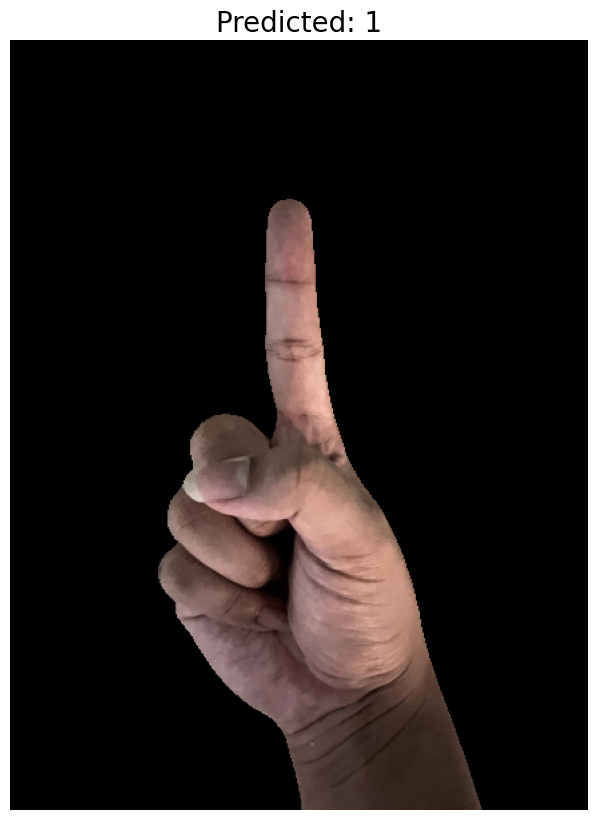

In [ ]:
import numpy as np
import cv2
import tensorflow as tf
import matplotlib.pyplot as plt
import os

model_path = "/content/CNN_LongDay.h5"
try:
    model = tf.keras.models.load_model(model_path)
except OSError as e:
    print(f"Error loading model from '{model_path}': {e}")
    exit()

letters = {
    0: "0",
    1: "1",
    2: "2",
    3: "3",
    4: "4",
    5: "5",
    6: "6",
    7: "7",
    8: "8",
    9: "9",
}

# Path to the base dataset and test image
base_path = "/content/asl_dataset"
image_path = "/content/no_background.png"  # Provide the path to your test image

# Function to preprocess the image and make predictions
def predict_image(image_path):
    test_image = cv2.imread(image_path)
    test_image = cv2.flip(test_image, 1)  # Flip horizontally if needed

    # Preprocess the image
    gray = cv2.cvtColor(test_image, cv2.COLOR_BGR2GRAY)
    gray = cv2.GaussianBlur(gray, (9, 9), 0)

    # Resize the image to match the model's input shape (64x64) and convert to three channels
    input_size = (64, 64)
    resized_image = cv2.resize(gray, input_size)
    resized_image = cv2.merge([resized_image] * 3)  # Duplicate the single channel to create three channels
    resized_image = resized_image.reshape(-1, input_size[0], input_size[1], 3) / 255.0  # Normalize

    prediction = model.predict(resized_image)
    predicted_letter_index = np.argmax(prediction)
    predicted_letter = letters[predicted_letter_index]

    return test_image, predicted_letter

# Predict and display the result for the test image
test_image, predicted_letter = predict_image(image_path)
print("Predicted Letter:", predicted_letter)

# Display the test image with the prediction
plt.figure(figsize=(10, 10))
plt.imshow(cv2.cvtColor(test_image, cv2.COLOR_BGR2RGB))
plt.title(f"Predicted: {predicted_letter}", fontsize=20)
plt.axis("off")
plt.show()